In [1]:
import numpy as np 
import pandas as pd 

In [2]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df_train = pd.read_csv('/kaggle/input/imdb-prediction-by-123-of-ai-weekend-hackathon/train_data.csv')
df_test = pd.read_csv('/kaggle/input/imdb-prediction-by-123-of-ai-weekend-hackathon/test_data_with_inputs.csv')
print(df_train.shape,df_test.shape)

(4225, 28) (470, 27)


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4225 entries, 0 to 4224
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   s_no                       4225 non-null   int64  
 1   director_name              4225 non-null   object 
 2   duration                   4225 non-null   float64
 3   director_facebook_likes    4225 non-null   float64
 4   actor_3_facebook_likes     4225 non-null   float64
 5   actor_2_name               4225 non-null   object 
 6   actor_1_facebook_likes     4225 non-null   float64
 7   gross                      4225 non-null   float64
 8   genres                     4225 non-null   object 
 9   actor_1_name               4225 non-null   object 
 10  movie_title                4225 non-null   object 
 11  num_voted_users            4225 non-null   int64  
 12  cast_total_facebook_likes  4225 non-null   int64  
 13  actor_3_name               4225 non-null   objec

In [5]:
df_train.describe()

,s_no,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,Profit,Profit_Percentage,critic_review_ratio,imdb_score
count,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4.225000e+03,4.225000e+03,4225.000000,4225.000000,4.225000e+03,4225.000000,4225.000000,4225.000000,4225.00000,4.225000e+03,4.225000e+03,4225.000000,4225.000000
mean,2453.915740,108.593136,707.537515,655.863905,6817.903195,4.604866e+07,8.841292e+04,10046.912426,1.366154,3.972844e+07,2002.164024,1698.986272,2.126277,7838.04071,-6.320218e+06,6.671254e+03,0.896648,6.427905
std,1436.634285,22.569440,2835.019787,1670.677214,15440.494498,6.440872e+07,1.419197e+05,18620.002492,2.033256,2.126622e+08,12.325422,4152.350628,0.666806,19911.91734,2.157819e+08,1.132255e+05,1.036943,1.105537
min,0.000000,14.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,2.180000e+02,1927.000000,0.000000,1.180000,0.00000,-5.235058e+08,-9.998610e+01,0.037037,1.600000
25%,1211.000000,94.000000,7.000000,141.000000,634.000000,8.070311e+06,1.066700e+04,1495.000000,0.000000,8.000000e+06,1999.000000,294.000000,1.850000,0.00000,-2.420000e+07,-6.202187e+01,0.384298,5.800000
50%,2432.000000,104.000000,51.000000,384.000000,1000.000000,2.600591e+07,3.790100e+04,3218.000000,1.000000,2.000000e+07,2005.000000,613.000000,2.350000,177.00000,-4.203192e+06,-2.007999e+01,0.625000,6.600000
75%,3678.000000,118.000000,209.000000,642.000000,11000.000000,5.454052e+07,1.018990e+05,14421.000000,2.000000,4.000000e+07,2010.000000,925.000000,2.350000,5000.00000,9.810821e+06,1.061175e+02,1.098121,7.200000
max,5042.000000,330.000000,22000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,1.221550e+10,2016.000000,137000.000000,16.000000,349000.00000,1.221330e+10,5.555456e+06,25.000000,9.300000


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


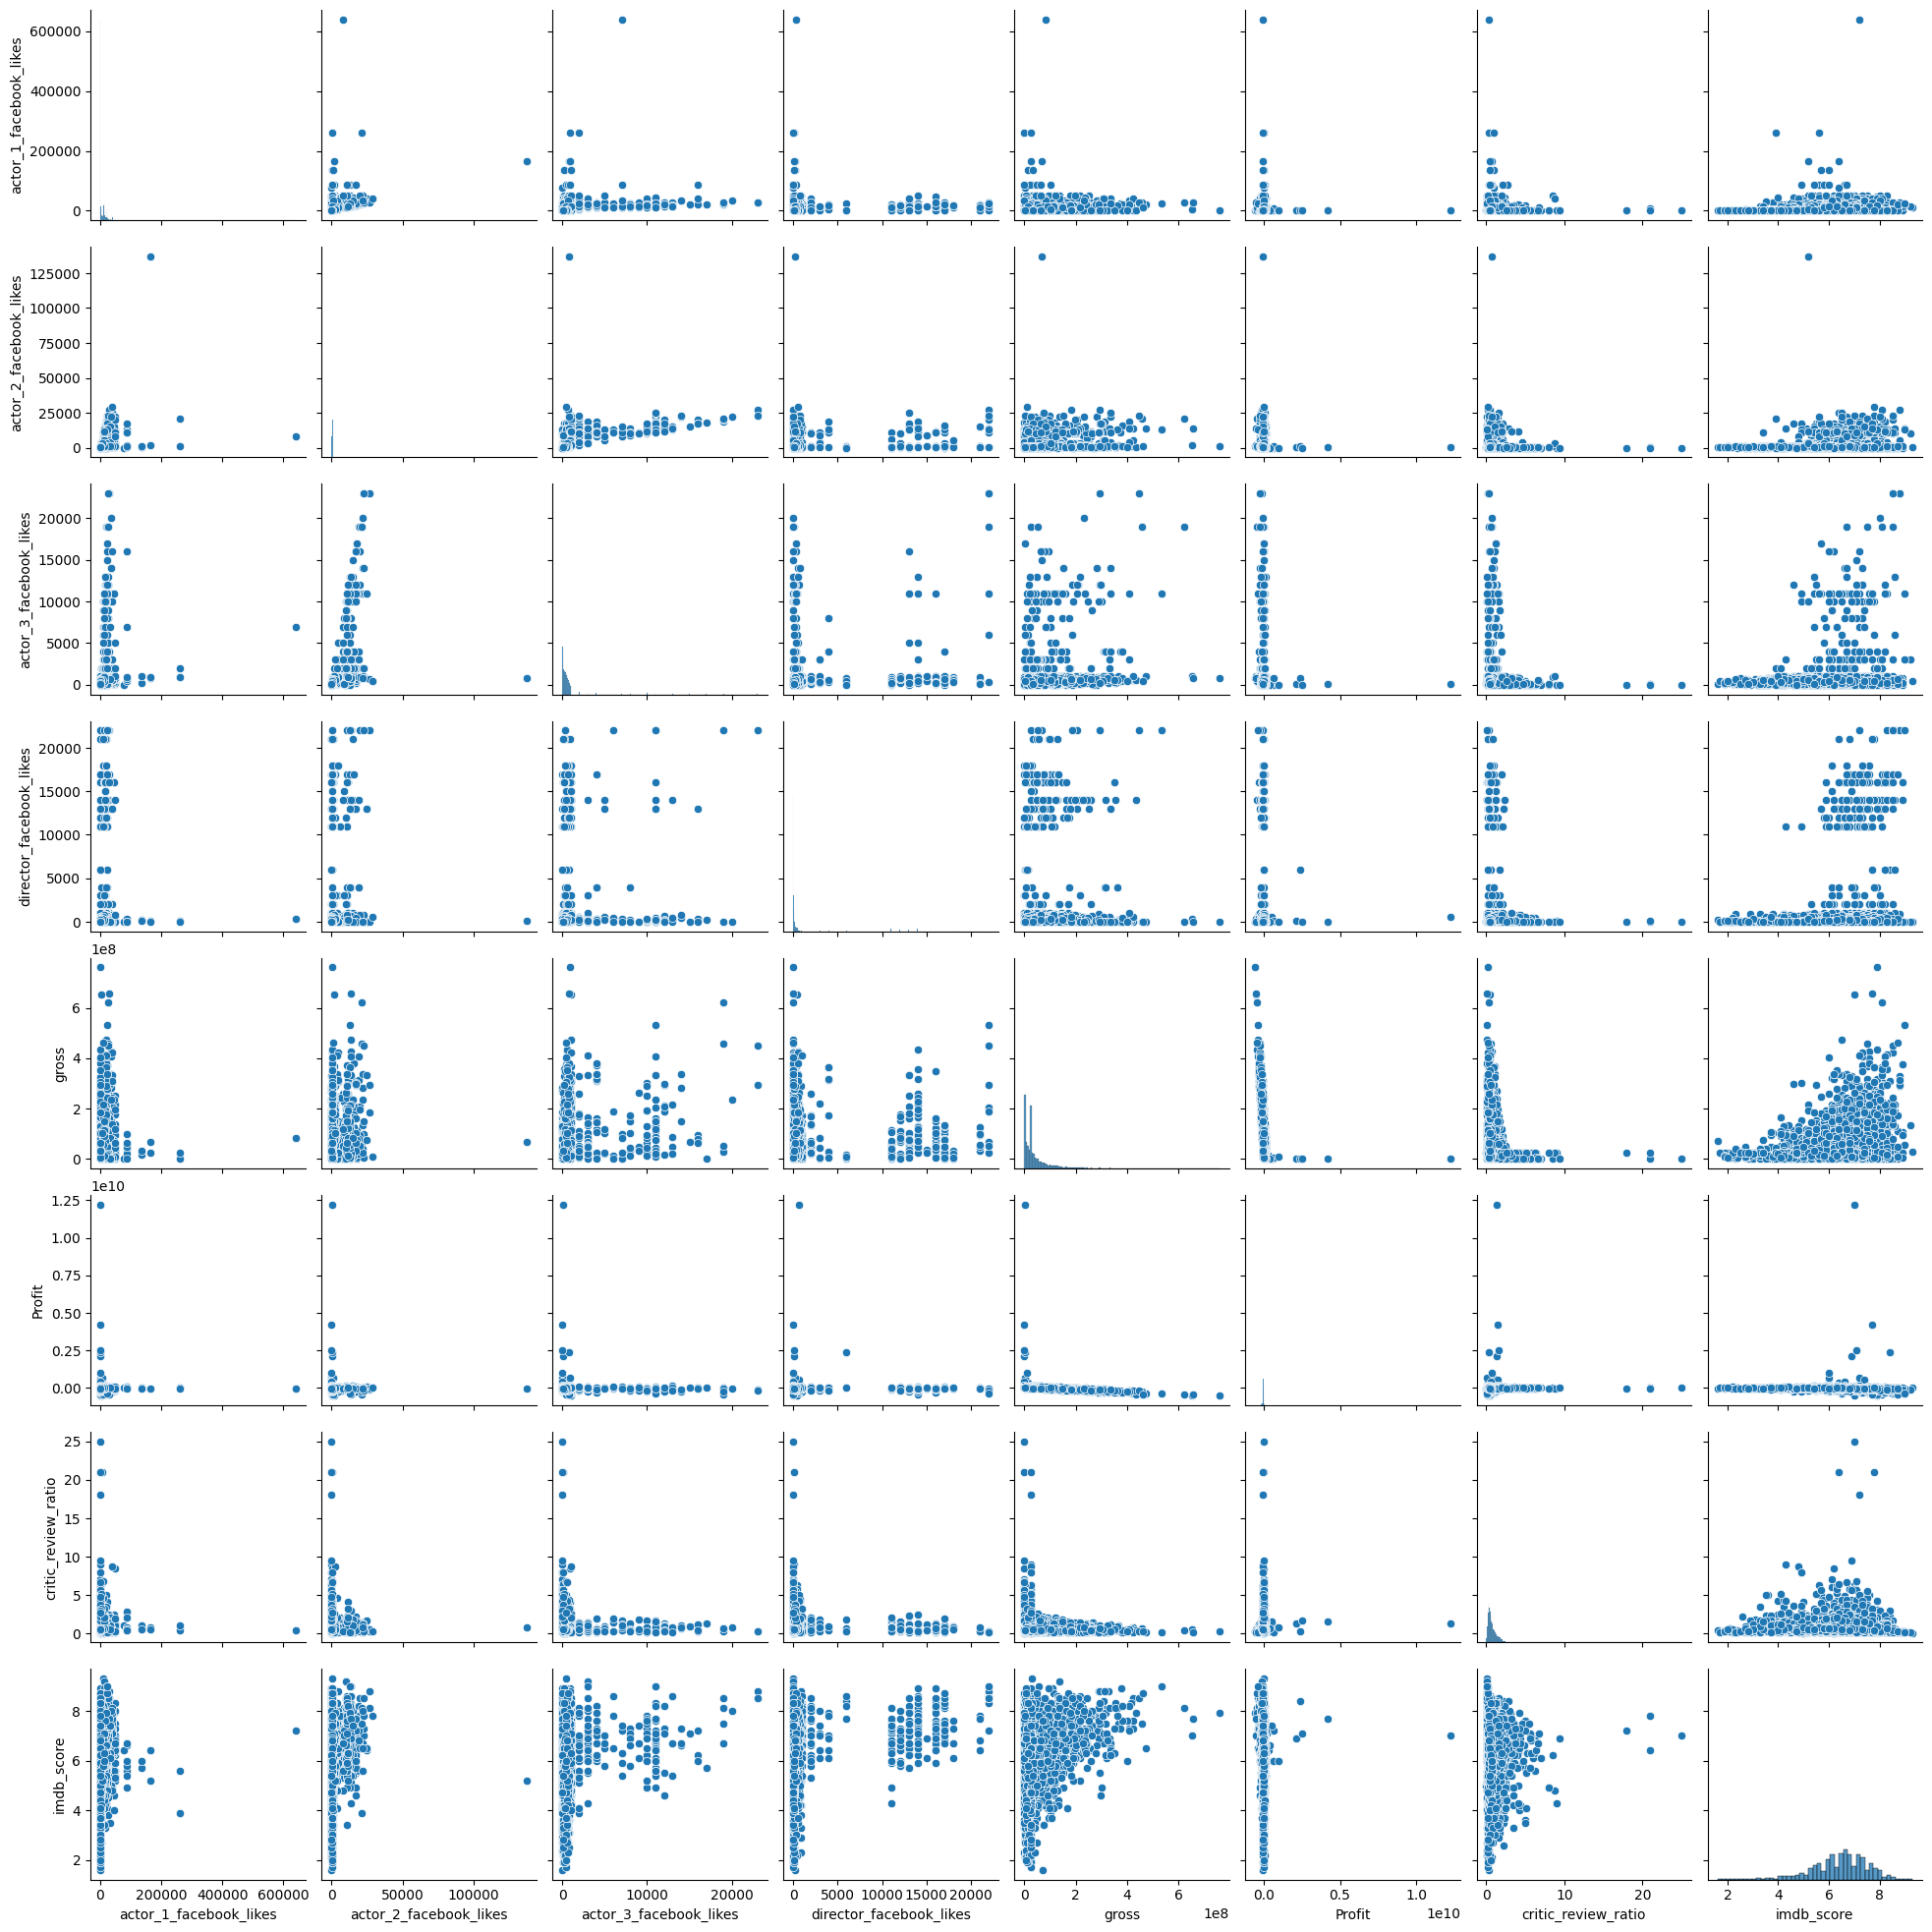

In [6]:
sns.pairplot(df_train[['actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes','director_facebook_likes','gross','Profit','critic_review_ratio', 'imdb_score']])
plt.show()

## Feature Engineering
* Convert Dummy Variables for Language, Country, & Content Rating

In [7]:
d = {'English' : 'lang_English', 'French' : 'lang_Other', 'Spanish' : 'lang_Other', 'Mandarin' : 'lang_Other', 'Hindi' : 'lang_Other', 'German' : 'lang_Other', 'Japanese' : 'lang_Other', 'Russian' : 'lang_Other', 'Cantonese' : 'lang_Other', 'Italian' : 'lang_Other', 'Korean' : 'lang_Other', 'Portuguese' : 'lang_Other', 'Danish' : 'lang_Other', 'Persian' : 'lang_Other', 'Norwegian' : 'lang_Other', 'Dutch' : 'lang_Other', 'Hebrew' : 'lang_Other', 'Arabic' : 'lang_Other', 'Swedish' : 'lang_Other', 'Thai' : 'lang_Other', 'Aboriginal' : 'lang_Other', 'Dari' : 'lang_Other', 'Zulu' : 'lang_Other', 'Kazakh' : 'lang_Other', 'Indonesian' : 'lang_Other', 'Maya' : 'lang_Other', 'Mongolian' : 'lang_Other', 'Icelandic' : 'lang_Other', 'Hungarian' : 'lang_Other', 'Polish' : 'lang_Other', 'Greek' : 'lang_Other', 'Romanian' : 'lang_Other', 'Dzongkha' : 'lang_Other', 'Czech' : 'lang_Other', 'Telugu' : 'lang_Other', 'Bosnian' : 'lang_Other', 'Vietnamese' : 'lang_Other'}
df_train[['language']] = df_train[['language']].apply(lambda x: x.map(d))

lang=pd.get_dummies(df_train['language'])
lang.drop('lang_Other', axis = 1, inplace = True)

lang[['lang_English']] = lang[['lang_English']].apply(lambda x: x.map({True:1, False:0}))
lang.head()

,lang_English
0,1
1,1
2,1
3,1
4,1


In [8]:
df_train = pd.concat([df_train, lang], axis = 1)
df_train.drop(['language'], axis = 1, inplace = True)
df_train.head()

,s_no,director_name,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,Profit,Profit_Percentage,critic_review_ratio,imdb_score,lang_English
0,1042,Phillip Noyce,118.0,176.0,308.0,Angelina Jolie Pitt,18000.0,66488090.0,Crime|Drama|Mystery|Thriller,Denzel Washington,...,48000000.0,1999.0,11000.0,2.35,0,-18488090.0,-27.806619,0.188917,6.7,1
1,2501,Daniel Barnz,86.0,33.0,583.0,Mary-Kate Olsen,15000.0,27854896.0,Drama|Fantasy|Romance,Alex Pettyfer,...,17000000.0,2011.0,976.0,2.35,16000,-10854896.0,-38.969436,1.147287,5.6,1
2,1248,Steven Spielberg,155.0,14000.0,11000.0,Morgan Freeman,12000.0,44175394.0,Drama|History,Anthony Hopkins,...,36000000.0,1997.0,11000.0,1.85,0,-8175394.0,-18.506669,0.339207,7.2,1
3,3892,Marc Forster,112.0,395.0,80.0,Peter Boyle,13000.0,31252964.0,Drama|Romance,Heath Ledger,...,4000000.0,2001.0,595.0,2.35,0,-27252964.0,-87.201214,0.293103,7.1,1
4,4315,James Watkins,91.0,43.0,418.0,Jack O'Connell,13000.0,5824.0,Horror|Thriller,Michael Fassbender,...,20000000.0,2008.0,698.0,2.35,0,19994176.0,343306.593407,0.450980,6.8,1


In [9]:
d = {'USA' : 'country_USA', 'UK' : 'country_UK', 'France' : 'country_FR', 'Canada' : 'country_Other', 'Germany' : 'country_Other', 'Australia' : 'country_Other', 'Spain' : 'country_Other', 'India' : 'country_Other', 'China' : 'country_Other', 'Italy' : 'country_Other', 'Japan' : 'country_Other', 'Hong Kong' : 'country_Other', 'New Zealand' : 'country_Other', 'South Korea' : 'country_Other', 'Mexico' : 'country_Other', 'Denmark' : 'country_Other', 'Russia' : 'country_Other', 'Ireland' : 'country_Other', 'Brazil' : 'country_Other', 'South Africa' : 'country_Other', 'Norway' : 'country_Other', 'Netherlands' : 'country_Other', 'Sweden' : 'country_Other', 'Switzerland' : 'country_Other', 'Thailand' : 'country_Other', 'West Germany' : 'country_Other', 'Iran' : 'country_Other', 'Czech Republic' : 'country_Other', 'Israel' : 'country_Other', 'Iceland' : 'country_Other', 'Belgium' : 'country_Other', 'Romania' : 'country_Other', 'Argentina' : 'country_Other', 'Finland' : 'country_Other', 'Bahamas' : 'country_Other', 'Turkey' : 'country_Other', 'Bulgaria' : 'country_Other', 'Taiwan' : 'country_Other', 'Cambodia' : 'country_Other', 'Chile' : 'country_Other', 'Colombia' : 'country_Other', 'Soviet Union' : 'country_Other', 'Georgia' : 'country_Other', 'Slovakia' : 'country_Other', 'Poland' : 'country_Other', 'Philippines' : 'country_Other', 'Peru' : 'country_Other', 'Official site' : 'country_Other', 'Greece' : 'country_Other', 'Nigeria' : 'country_Other', 'Hungary' : 'country_Other', 'New Line' : 'country_Other', 'Libya' : 'country_Other', 'Afghanistan' : 'country_Other'}
df_train[['country']] = df_train[['country']].apply(lambda x: x.map(d))
country=pd.get_dummies(df_train['country'])
country.drop('country_Other', axis = 1, inplace = True)
country[['country_USA']] = country[['country_USA']].apply(lambda x: x.map({True:1, False:0}))
country[['country_UK']] = country[['country_UK']].apply(lambda x: x.map({True:1, False:0}))
country[['country_FR']] = country[['country_FR']].apply(lambda x: x.map({True:1, False:0}))

df_train = pd.concat([df_train, country], axis = 1)
df_train.drop(['country'], axis = 1, inplace = True)
df_train.head()

,s_no,director_name,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,aspect_ratio,movie_facebook_likes,Profit,Profit_Percentage,critic_review_ratio,imdb_score,lang_English,country_FR,country_UK,country_USA
0,1042,Phillip Noyce,118.0,176.0,308.0,Angelina Jolie Pitt,18000.0,66488090.0,Crime|Drama|Mystery|Thriller,Denzel Washington,...,2.35,0,-18488090.0,-27.806619,0.188917,6.7,1,0,0,1
1,2501,Daniel Barnz,86.0,33.0,583.0,Mary-Kate Olsen,15000.0,27854896.0,Drama|Fantasy|Romance,Alex Pettyfer,...,2.35,16000,-10854896.0,-38.969436,1.147287,5.6,1,0,0,1
2,1248,Steven Spielberg,155.0,14000.0,11000.0,Morgan Freeman,12000.0,44175394.0,Drama|History,Anthony Hopkins,...,1.85,0,-8175394.0,-18.506669,0.339207,7.2,1,0,0,1
3,3892,Marc Forster,112.0,395.0,80.0,Peter Boyle,13000.0,31252964.0,Drama|Romance,Heath Ledger,...,2.35,0,-27252964.0,-87.201214,0.293103,7.1,1,0,0,1
4,4315,James Watkins,91.0,43.0,418.0,Jack O'Connell,13000.0,5824.0,Horror|Thriller,Michael Fassbender,...,2.35,0,19994176.0,343306.593407,0.450980,6.8,1,0,1,0


In [10]:
d={'R' : 'contentRate_R', 'PG-13' : 'contentRate_PG-13', 'PG' : 'contentRate_PG', 'G' : 'contentRate_other', 'Not Rated' : 'contentRate_other', 'Unrated' : 'contentRate_other', 'Approved' : 'contentRate_other', 'X' : 'contentRate_other', 'NC-17' : 'contentRate_other', 'GP' : 'contentRate_other', 'Passed' : 'contentRate_other', 'M' : 'contentRate_other', 'TV-14' : 'contentRate_other', 'TV-G' : 'contentRate_other', 'TV-PG' : 'contentRate_other'}
df_train[['content_rating']] = df_train[['content_rating']].apply(lambda x: x.map(d))
cnt_rt=pd.get_dummies(df_train['content_rating'])
cnt_rt.drop('contentRate_other', axis = 1, inplace = True)
cnt_rt[['contentRate_R']] = cnt_rt[['contentRate_R']].apply(lambda x: x.map({True:1, False:0}))
cnt_rt[['contentRate_PG-13']] = cnt_rt[['contentRate_PG-13']].apply(lambda x: x.map({True:1, False:0}))
cnt_rt[['contentRate_PG']] = cnt_rt[['contentRate_PG']].apply(lambda x: x.map({True:1, False:0}))

df_train = pd.concat([df_train, cnt_rt], axis = 1)
df_train.drop(['content_rating'], axis = 1, inplace = True)
df_train.head()

,s_no,director_name,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,Profit_Percentage,critic_review_ratio,imdb_score,lang_English,country_FR,country_UK,country_USA,contentRate_PG,contentRate_PG-13,contentRate_R
0,1042,Phillip Noyce,118.0,176.0,308.0,Angelina Jolie Pitt,18000.0,66488090.0,Crime|Drama|Mystery|Thriller,Denzel Washington,...,-27.806619,0.188917,6.7,1,0,0,1,0,0,1
1,2501,Daniel Barnz,86.0,33.0,583.0,Mary-Kate Olsen,15000.0,27854896.0,Drama|Fantasy|Romance,Alex Pettyfer,...,-38.969436,1.147287,5.6,1,0,0,1,0,1,0
2,1248,Steven Spielberg,155.0,14000.0,11000.0,Morgan Freeman,12000.0,44175394.0,Drama|History,Anthony Hopkins,...,-18.506669,0.339207,7.2,1,0,0,1,0,0,1
3,3892,Marc Forster,112.0,395.0,80.0,Peter Boyle,13000.0,31252964.0,Drama|Romance,Heath Ledger,...,-87.201214,0.293103,7.1,1,0,0,1,0,0,1
4,4315,James Watkins,91.0,43.0,418.0,Jack O'Connell,13000.0,5824.0,Horror|Thriller,Michael Fassbender,...,343306.593407,0.450980,6.8,1,0,1,0,0,0,1


#### Lets drop some variblaes which we havent convertedfrom Object & doesnt look of much significance

In [11]:
df_train.drop(['director_name','actor_3_name','actor_2_name', 'genres','actor_1_name', 'movie_title', 'facenumber_in_poster','plot_keywords'], axis = 1, inplace = True)

In [12]:
df_train=  df_train.drop(['num_voted_users'], axis = 1)

In [13]:
df_train = pd.DataFrame(df_train).set_index('s_no')

## Replicating changes in Test data 

In [14]:
d = {'English' : 'lang_English', 'French' : 'lang_Other', 'Spanish' : 'lang_Other', 'Mandarin' : 'lang_Other', 'Hindi' : 'lang_Other', 'German' : 'lang_Other', 'Japanese' : 'lang_Other', 'Russian' : 'lang_Other', 'Cantonese' : 'lang_Other', 'Italian' : 'lang_Other', 'Korean' : 'lang_Other', 'Portuguese' : 'lang_Other', 'Danish' : 'lang_Other', 'Persian' : 'lang_Other', 'Norwegian' : 'lang_Other', 'Dutch' : 'lang_Other', 'Hebrew' : 'lang_Other', 'Arabic' : 'lang_Other', 'Swedish' : 'lang_Other', 'Thai' : 'lang_Other', 'Aboriginal' : 'lang_Other', 'Dari' : 'lang_Other', 'Zulu' : 'lang_Other', 'Kazakh' : 'lang_Other', 'Indonesian' : 'lang_Other', 'Maya' : 'lang_Other', 'Mongolian' : 'lang_Other', 'Icelandic' : 'lang_Other', 'Hungarian' : 'lang_Other', 'Polish' : 'lang_Other', 'Greek' : 'lang_Other', 'Romanian' : 'lang_Other', 'Dzongkha' : 'lang_Other', 'Czech' : 'lang_Other', 'Telugu' : 'lang_Other', 'Bosnian' : 'lang_Other', 'Vietnamese' : 'lang_Other'}
df_test[['language']] = df_test[['language']].apply(lambda x: x.map(d))
lang=pd.get_dummies(df_test['language'])
lang.drop('lang_Other', axis = 1, inplace = True)

df_test = pd.concat([df_test, lang], axis = 1)
df_test.drop(['language'], axis = 1, inplace = True)
df_test.head()

,s_no,director_name,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,content_rating,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,Profit,Profit_Percentage,critic_review_ratio,lang_English
0,1469,John Singleton,106.0,309.0,63.0,Benjamin J. Cain Jr.,327.0,28064226.0,Action|Mystery|Thriller,Ken Arnold,...,PG-13,35000000.0,2011.0,73.0,2.35,13000,6935774.0,24.713933,1.040462,True
1,444,Gary Winick,97.0,56.0,852.0,Julia Roberts,12000.0,82506325.0,Comedy|Family|Fantasy,Steve Buscemi,...,G,20000000.0,2006.0,8000.0,1.85,0,-62506325.0,-75.759434,1.176471,True
2,4871,Jeff Nichols,92.0,337.0,22.0,Natalie Canerday,35.0,45661.0,Drama|Thriller,Michael Abbott Jr.,...,PG-13,20000000.0,2007.0,32.0,2.35,773,19954339.0,43701.055605,2.656250,True
3,877,Clint Eastwood,141.0,16000.0,539.0,Michael Kelly,11000.0,35707327.0,Crime|Drama|Mystery|Thriller,Angelina Jolie Pitt,...,R,55000000.0,2008.0,963.0,2.35,14000,19292673.0,54.030012,0.682171,True
4,4355,Jamal Hill,89.0,47.0,585.0,Adam Ratcliffe,628.0,444044.0,Drama,Logan Browning,...,R,1900000.0,2015.0,606.0,1.85,1000,1455956.0,327.885525,0.526316,True


In [15]:
d = {'USA' : 'country_USA', 'UK' : 'country_UK', 'France' : 'country_FR', 'Canada' : 'country_Other', 'Germany' : 'country_Other', 'Australia' : 'country_Other', 'Spain' : 'country_Other', 'India' : 'country_Other', 'China' : 'country_Other', 'Italy' : 'country_Other', 'Japan' : 'country_Other', 'Hong Kong' : 'country_Other', 'New Zealand' : 'country_Other', 'South Korea' : 'country_Other', 'Mexico' : 'country_Other', 'Denmark' : 'country_Other', 'Russia' : 'country_Other', 'Ireland' : 'country_Other', 'Brazil' : 'country_Other', 'South Africa' : 'country_Other', 'Norway' : 'country_Other', 'Netherlands' : 'country_Other', 'Sweden' : 'country_Other', 'Switzerland' : 'country_Other', 'Thailand' : 'country_Other', 'West Germany' : 'country_Other', 'Iran' : 'country_Other', 'Czech Republic' : 'country_Other', 'Israel' : 'country_Other', 'Iceland' : 'country_Other', 'Belgium' : 'country_Other', 'Romania' : 'country_Other', 'Argentina' : 'country_Other', 'Finland' : 'country_Other', 'Bahamas' : 'country_Other', 'Turkey' : 'country_Other', 'Bulgaria' : 'country_Other', 'Taiwan' : 'country_Other', 'Cambodia' : 'country_Other', 'Chile' : 'country_Other', 'Colombia' : 'country_Other', 'Soviet Union' : 'country_Other', 'Georgia' : 'country_Other', 'Slovakia' : 'country_Other', 'Poland' : 'country_Other', 'Philippines' : 'country_Other', 'Peru' : 'country_Other', 'Official site' : 'country_Other', 'Greece' : 'country_Other', 'Nigeria' : 'country_Other', 'Hungary' : 'country_Other', 'New Line' : 'country_Other', 'Libya' : 'country_Other', 'Afghanistan' : 'country_Other'}
df_test[['country']] = df_test[['country']].apply(lambda x: x.map(d))
country=pd.get_dummies(df_test['country'])
country.drop('country_Other', axis = 1, inplace = True)

df_test = pd.concat([df_test, country], axis = 1)
df_test.drop(['country'], axis = 1, inplace = True)
df_test.head()

,s_no,director_name,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,Profit,Profit_Percentage,critic_review_ratio,lang_English,country_FR,country_UK,country_USA
0,1469,John Singleton,106.0,309.0,63.0,Benjamin J. Cain Jr.,327.0,28064226.0,Action|Mystery|Thriller,Ken Arnold,...,73.0,2.35,13000,6935774.0,24.713933,1.040462,True,False,False,True
1,444,Gary Winick,97.0,56.0,852.0,Julia Roberts,12000.0,82506325.0,Comedy|Family|Fantasy,Steve Buscemi,...,8000.0,1.85,0,-62506325.0,-75.759434,1.176471,True,False,False,True
2,4871,Jeff Nichols,92.0,337.0,22.0,Natalie Canerday,35.0,45661.0,Drama|Thriller,Michael Abbott Jr.,...,32.0,2.35,773,19954339.0,43701.055605,2.656250,True,False,False,True
3,877,Clint Eastwood,141.0,16000.0,539.0,Michael Kelly,11000.0,35707327.0,Crime|Drama|Mystery|Thriller,Angelina Jolie Pitt,...,963.0,2.35,14000,19292673.0,54.030012,0.682171,True,False,False,True
4,4355,Jamal Hill,89.0,47.0,585.0,Adam Ratcliffe,628.0,444044.0,Drama,Logan Browning,...,606.0,1.85,1000,1455956.0,327.885525,0.526316,True,False,False,True


In [16]:
d={'R' : 'contentRate_R', 'PG-13' : 'contentRate_PG-13', 'PG' : 'contentRate_PG', 'G' : 'contentRate_other', 'Not Rated' : 'contentRate_other', 'Unrated' : 'contentRate_other', 'Approved' : 'contentRate_other', 'X' : 'contentRate_other', 'NC-17' : 'contentRate_other', 'GP' : 'contentRate_other', 'Passed' : 'contentRate_other', 'M' : 'contentRate_other', 'TV-14' : 'contentRate_other', 'TV-G' : 'contentRate_other', 'TV-PG' : 'contentRate_other'}
df_test[['content_rating']] = df_test[['content_rating']].apply(lambda x: x.map(d))
cnt_rt=pd.get_dummies(df_test['content_rating'])
cnt_rt.drop('contentRate_other', axis = 1, inplace = True)

df_test = pd.concat([df_test, cnt_rt], axis = 1)
df_test.drop(['content_rating'], axis = 1, inplace = True)
df_test.head()

,s_no,director_name,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,Profit,Profit_Percentage,critic_review_ratio,lang_English,country_FR,country_UK,country_USA,contentRate_PG,contentRate_PG-13,contentRate_R
0,1469,John Singleton,106.0,309.0,63.0,Benjamin J. Cain Jr.,327.0,28064226.0,Action|Mystery|Thriller,Ken Arnold,...,6935774.0,24.713933,1.040462,True,False,False,True,False,True,False
1,444,Gary Winick,97.0,56.0,852.0,Julia Roberts,12000.0,82506325.0,Comedy|Family|Fantasy,Steve Buscemi,...,-62506325.0,-75.759434,1.176471,True,False,False,True,False,False,False
2,4871,Jeff Nichols,92.0,337.0,22.0,Natalie Canerday,35.0,45661.0,Drama|Thriller,Michael Abbott Jr.,...,19954339.0,43701.055605,2.656250,True,False,False,True,False,True,False
3,877,Clint Eastwood,141.0,16000.0,539.0,Michael Kelly,11000.0,35707327.0,Crime|Drama|Mystery|Thriller,Angelina Jolie Pitt,...,19292673.0,54.030012,0.682171,True,False,False,True,False,False,True
4,4355,Jamal Hill,89.0,47.0,585.0,Adam Ratcliffe,628.0,444044.0,Drama,Logan Browning,...,1455956.0,327.885525,0.526316,True,False,False,True,False,False,True


In [17]:
df_test.drop(['director_name','actor_3_name','actor_2_name', 'actor_1_name', 'movie_title', 'num_voted_users','genres', 'facenumber_in_poster','plot_keywords'], axis = 1, inplace = True)

In [18]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   s_no                       470 non-null    int64  
 1   duration                   470 non-null    float64
 2   director_facebook_likes    470 non-null    float64
 3   actor_3_facebook_likes     470 non-null    float64
 4   actor_1_facebook_likes     470 non-null    float64
 5   gross                      470 non-null    float64
 6   cast_total_facebook_likes  470 non-null    int64  
 7   budget                     470 non-null    float64
 8   title_year                 470 non-null    float64
 9   actor_2_facebook_likes     470 non-null    float64
 10  aspect_ratio               470 non-null    float64
 11  movie_facebook_likes       470 non-null    int64  
 12  Profit                     470 non-null    float64
 13  Profit_Percentage          470 non-null    float64

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4225 entries, 1042 to 3118
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   duration                   4225 non-null   float64
 1   director_facebook_likes    4225 non-null   float64
 2   actor_3_facebook_likes     4225 non-null   float64
 3   actor_1_facebook_likes     4225 non-null   float64
 4   gross                      4225 non-null   float64
 5   cast_total_facebook_likes  4225 non-null   int64  
 6   budget                     4225 non-null   float64
 7   title_year                 4225 non-null   float64
 8   actor_2_facebook_likes     4225 non-null   float64
 9   aspect_ratio               4225 non-null   float64
 10  movie_facebook_likes       4225 non-null   int64  
 11  Profit                     4225 non-null   float64
 12  Profit_Percentage          4225 non-null   float64
 13  critic_review_ratio        4225 non-null   float64

In [20]:
df_train2=  df_train.drop([ 'cast_total_facebook_likes', 'budget',
       'aspect_ratio', 'Profit', 'country_FR',
       'country_UK', 'contentRate_PG', 'contentRate_PG-13',
       'contentRate_R'], axis = 1)

In [21]:
df_test2=  df_test.drop([ 'cast_total_facebook_likes', 'budget',
       'aspect_ratio', 'Profit', 'country_FR',
       'country_UK', 'contentRate_PG', 'contentRate_PG-13',
       'contentRate_R'], axis = 1)

In [22]:
df_train2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4225 entries, 1042 to 3118
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration                 4225 non-null   float64
 1   director_facebook_likes  4225 non-null   float64
 2   actor_3_facebook_likes   4225 non-null   float64
 3   actor_1_facebook_likes   4225 non-null   float64
 4   gross                    4225 non-null   float64
 5   title_year               4225 non-null   float64
 6   actor_2_facebook_likes   4225 non-null   float64
 7   movie_facebook_likes     4225 non-null   int64  
 8   Profit_Percentage        4225 non-null   float64
 9   critic_review_ratio      4225 non-null   float64
 10  imdb_score               4225 non-null   float64
 11  lang_English             4225 non-null   int64  
 12  country_USA              4225 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 462.1 KB


In [23]:
x = df_train2.iloc[ : ,0:10]
x1 = df_train2.iloc[ : ,11:14]
x = pd.concat([x, x1], axis = 1)
y = df_train2.iloc[ : ,10:11]
feature_names = ['duration','director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'title_year', 'actor_2_facebook_likes', 'movie_facebook_likes','Profit_Percentage', 'critic_review_ratio','lang_English','country_USA']

In [24]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4225 entries, 1042 to 3118
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration                 4225 non-null   float64
 1   director_facebook_likes  4225 non-null   float64
 2   actor_3_facebook_likes   4225 non-null   float64
 3   actor_1_facebook_likes   4225 non-null   float64
 4   gross                    4225 non-null   float64
 5   title_year               4225 non-null   float64
 6   actor_2_facebook_likes   4225 non-null   float64
 7   movie_facebook_likes     4225 non-null   int64  
 8   Profit_Percentage        4225 non-null   float64
 9   critic_review_ratio      4225 non-null   float64
 10  lang_English             4225 non-null   int64  
 11  country_USA              4225 non-null   int64  
dtypes: float64(9), int64(3)
memory usage: 429.1 KB


In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [26]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [27]:
y_train

,imdb_score
s_no,
859,6.3
1516,5.5
4983,5.8
125,7.6
1299,4.8
...,...
3050,5.1
4709,6.5
1770,6.7


In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

from sklearn.ensemble import (
    GradientBoostingRegressor,
    RandomForestRegressor,
    VotingRegressor,
)
from sklearn.linear_model import LinearRegression


reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()

reg1.fit(x_train, y_train)
reg2.fit(x_train, y_train)
reg3.fit(x_train, y_train)

ereg = VotingRegressor([("gb", reg1), ("rf", reg2), ("lr", reg3)])
ereg.fit(x_train, y_train)

pred1 = reg1.predict(x_test)
pred2 = reg2.predict(x_test)
pred3 = reg3.predict(x_test)
pred4 = ereg.predict(x_test)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/tmp/ipykernel_751/3952626323.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg2.fit(x_train, y_train)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
print(round(metrics.r2_score(y_test, pred1),2), round(np.sqrt(metrics.mean_squared_error(y_test, pred1)),2))
print(round(metrics.r2_score(y_test, pred2),2), round(np.sqrt(metrics.mean_squared_error(y_test, pred2)),2))
print(round(metrics.r2_score(y_test, pred3),2), round(np.sqrt(metrics.mean_squared_error(y_test, pred3)),2))
print(round(metrics.r2_score(y_test, pred4),2), round(np.sqrt(metrics.mean_squared_error(y_test, pred4)),2))

0.48 0.82
0.48 0.81
0.29 0.95
0.47 0.82


## Now running prediction on the Input Test Data 

In [30]:
x_test_given = df_test.iloc[ : ,1:28]
y_pred1 = df_test.iloc[ : ,0:1]
print(x_test_given.shape,y_pred1.shape)

(470, 21) (470, 1)


In [31]:
x_test_given = x_test_given.drop([ 'cast_total_facebook_likes', 'budget',
       'aspect_ratio', 'Profit', 'country_FR',
       'country_UK', 'contentRate_PG', 'contentRate_PG-13',
       'contentRate_R'], axis = 1)

In [32]:
x_test_given = sc.transform(x_test_given)

In [33]:
y_pred1["imdb_score"] = ereg.predict(x_test_given)

In [34]:
y_pred1

,s_no,imdb_score
0,1469,6.233710
1,444,6.201672
2,4871,6.384270
3,877,7.384922
4,4355,5.436091
...,...,...
465,3899,6.897786
466,1330,6.592174
467,4358,7.892066
468,4611,5.566067


In [35]:
submission = pd.DataFrame(y_pred1).set_index('s_no')
submission.to_csv('output_submission.csv')